# 🛒 Hypothesis Testing: Does Applying a Discount Increase the Purchase Amount?
### 📊 Walmart Customer Transactions

**Objective:**  
We are testing whether discounts lead to higher spending.  
Using an **independent t-test**, we will compare the average purchase amount for transactions **with** and **without discounts**.

📌 **Null Hypothesis (\(H_0\))**: There is no difference in average purchase amounts.  
📌 **Alternative Hypothesis (\(H_1\))**: Transactions with discounts have a higher average purchase amount.

We use an Independent t-Test (Two-Sample t-Test) because:

The two groups (discounted vs. non-discounted transactions) are independent (i.e., one purchase being discounted does not affect another purchase being non-discounted).
We are testing whether the mean purchase amount in one group is greater than the other.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("/kaggle/input/walmart-customer-purchase-behavior-dataset/Walmart_customer_purchases.csv")  # Adjust the path for Kaggle
df.head()  # Display first few rows

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


## 🔍 Data Preprocessing
Before performing hypothesis testing, we check for:
- Missing values
- Data types
- Outliers
- Any necessary transformations

In [3]:
# Check for missing values
df.info()  # Summary of dataset
df.isnull().sum()  # Count missing values per column

# Convert categorical columns if necessary
df['Discount_Applied'] = df['Discount_Applied'].map({'Yes': 1, 'No': 0})

# Convert Purchase_Amount to numeric
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'], errors='coerce')

# Remove missing values
df = df.dropna(subset=['Purchase_Amount'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


In [4]:
# Checking if the mapping worked.
print(df['Discount_Applied'].unique())  # Should output [0, 1]

[0 1]


## 📊 Exploratory Data Analysis (EDA)
Before performing the hypothesis test, let's visualize:
- Distribution of Purchase Amounts
- Effect of Discount on Purchase Amount


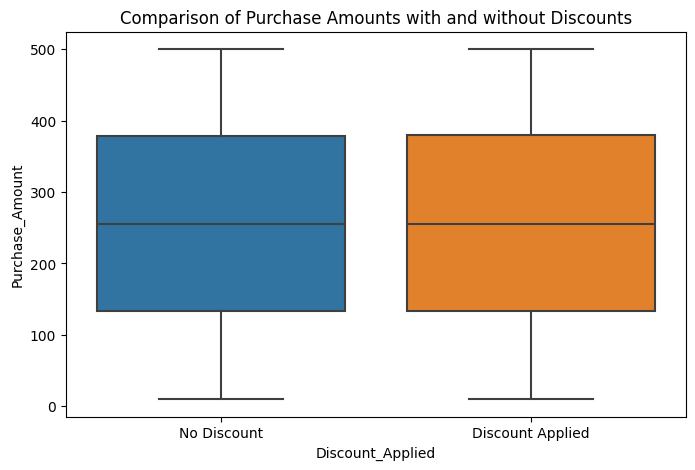

,count,mean,std,min,25%,50%,75%,max
Discount_Applied,,,,,,,,
0,25018.0,255.489013,141.554644,10.01,133.4125,255.005,378.3525,499.99
1,24982.0,255.575508,141.597033,10.08,132.6400,255.075,379.2975,499.99


In [5]:
# Boxplot of Purchase Amounts with and without Discount
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Discount_Applied'], y=df['Purchase_Amount'])
plt.xticks([0, 1], ['No Discount', 'Discount Applied'])
plt.title("Comparison of Purchase Amounts with and without Discounts")
plt.show()

# Descriptive statistics
df.groupby('Discount_Applied')['Purchase_Amount'].describe()

## 🧪 Hypothesis Testing

### **Why Choose \(α = 0.05\)?**
In hypothesis testing, **\(α) (alpha)** represents the **significance level**, which is the probability of making a **Type 1 error** (rejecting \(H_0\) when it is actually true).

The **default choice in many fields** (including business, social sciences, and healthcare) is **\(α = 0.05\)**, which means:

- We are willing to accept a **5% chance of incorrectly rejecting the null hypothesis** (\(H_0\)).
- In other words, there is a **95% confidence level** that our decision is correct.


### 📌 When Should We Use a Different Alpha?

#### **🔹 More Strict (Lower Alpha: \(α = 0.01\))**
- Used in **medical trials, fraud detection, or high-risk decision-making**, where a **false positive (Type 1 error) is costly**.
- **Example:** Testing a new drug—incorrectly claiming it works could be dangerous.

#### **🔹 More Lenient (Higher Alpha: \(α = 0.10\))**
- Used in **exploratory research or early-stage testing**, where **Type 2 errors (missing a real effect) are more concerning**.
- **Example:** A/B testing in marketing—if a slight increase in sales is observed, it might be worth considering.


In [6]:
# Split data into two groups
discounted = df[df['Discount_Applied'] == 1]['Purchase_Amount']
non_discounted = df[df['Discount_Applied'] == 0]['Purchase_Amount']

# Perform independent t-test
t_stat, p_value = ttest_ind(discounted, non_discounted, alternative='greater')

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("📌 Conclusion: Reject the null hypothesis (H0). Discounts increase purchase amount.")
else:
    print("📌 Conclusion: Fail to reject the null hypothesis (H0). No significant effect of discounts.")


T-statistic: 0.0683
P-value: 0.4728
📌 Conclusion: Fail to reject the null hypothesis (H0). No significant effect of discounts.


### **📌 Final Conclusion**
Based on the independent t-test results:  
- **T-statistic:** 0.0683  
- **P-value:** 0.4728  

Since the **p-value (0.4728) is much greater than** the significance level **\(α = 0.05\)**, we **fail to reject the null hypothesis (\(H_0\))**.  

### **🚀 Interpretation:**  
There is **no statistically significant difference** in purchase amounts between transactions **with and without discounts**. This suggests that applying discounts **does not significantly increase the average purchase amount**.

### **💡 Business Implications:**  
- Offering discounts may **not be an effective strategy** for increasing spending per transaction.  
- Instead, Walmart could **analyze other factors** that drive higher purchases, such as bundling products, targeted promotions, or loyalty rewards.  
- Future analysis could explore **category-specific trends**—perhaps discounts work better for certain product types.  
